## First, define all our little helper functions


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
"""
FROM https://colab.research.google.com/github/Niranjankumar-c/DeepLearning-PadhAI/blob/master/DeepLearning_Materials/6_VisualizationCNN_Pytorch/CNNVisualisation.ipynb#scrollTo=qv-nJbDFuNuN
"""

def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])

In [4]:
"""
FROM https://colab.research.google.com/github/Niranjankumar-c/DeepLearning-PadhAI/blob/master/DeepLearning_Materials/6_VisualizationCNN_Pytorch/CNNVisualisation.ipynb#scrollTo=qv-nJbDFuNuN
"""

def plot_filters_multi_channel(t):
    
    #get the number of kernals
    num_kernels = t.shape[0]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

In [5]:
"""
FROM https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e
"""

from torch import nn

def plot_weights(model, layer_num, single_channel = True, collated = False):
  
  #extracting the model features at the particular layer number
  layer = model.features[layer_num]
  
  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    
    if single_channel:
      if collated:
        plot_filters_single_channel_big(weight_tensor)
      else:
        plot_filters_single_channel(weight_tensor)
        
    else:
      if weight_tensor.shape[1] == 3:
        plot_filters_multi_channel(weight_tensor)
      else:
        print("Can only plot weights with three channels with single channel = False")
        
  else:
    print("Can only visualize layers which are convolutional")

## Let's first look at a trained AlexNet model

In [6]:
"""
FROM https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e
"""

# alexnet pretrained with imagenet data
# import model zoo in torchvision
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Neilm/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100.0%


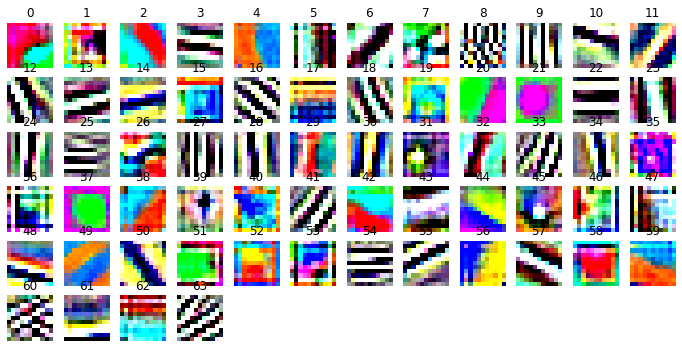

In [7]:
"""
FROM https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e
"""

# visualize weights for alexnet — first conv layer
plot_weights(alexnet, 0, single_channel = False)

## Now, I want to train a new model from scratch, exactly as specified in the original AlexNet paper.
https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

In [8]:
scratchAlex = models.alexnet(pretrained=False)

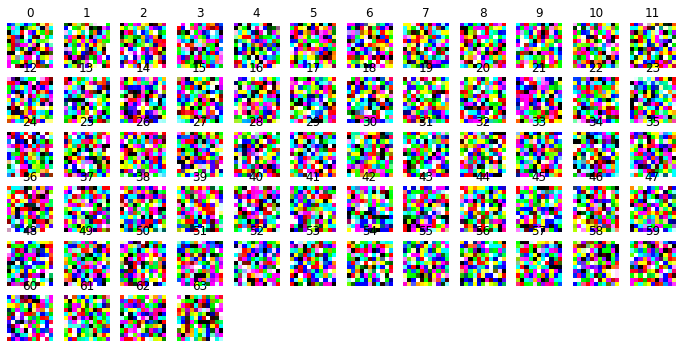

In [9]:
"""
FROM https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e
"""

# Here, we expect to see random, noisy filters since they haven't been trained yet.
plot_weights(scratchAlex, 0, single_channel = False)

Okay, I trained it for 30 epochs, let's check the filters.

In [11]:
import os
import torch
from model import initialize_model

data_dir = "D:/256_train_and_val"
MODEL_FOLDER = "./models/%s_model" % (data_dir.split("/")[-1])
num_classes = 1000
feature_extract = False

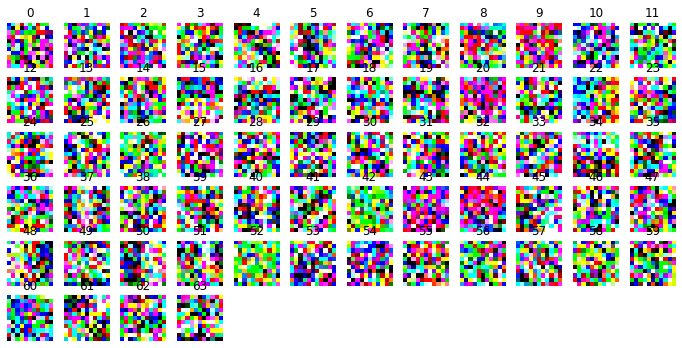

In [13]:
model0 = initialize_model(num_classes, feature_extract, use_pretrained=False)

# Load the best model checkpoint, if you have one
if os.path.isfile(os.path.join(MODEL_FOLDER, "0.pt")):
    checkpoint = torch.load(os.path.join(MODEL_FOLDER, "0.pt"))
    model0.load_state_dict(checkpoint['model_state_dict'])
    
plot_weights(model0, 0, single_channel = False)

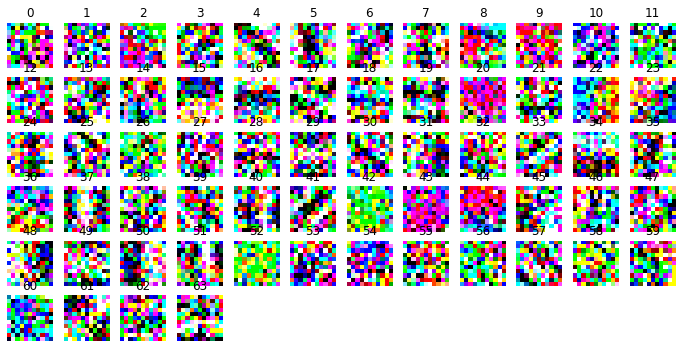

In [15]:
model1 = initialize_model(num_classes, feature_extract, use_pretrained=False)

# Load the best model checkpoint, if you have one
if os.path.isfile(os.path.join(MODEL_FOLDER, "1.pt")):
    checkpoint = torch.load(os.path.join(MODEL_FOLDER, "1.pt"))
    model1.load_state_dict(checkpoint['model_state_dict'])
    
plot_weights(model1, 0, single_channel = False)

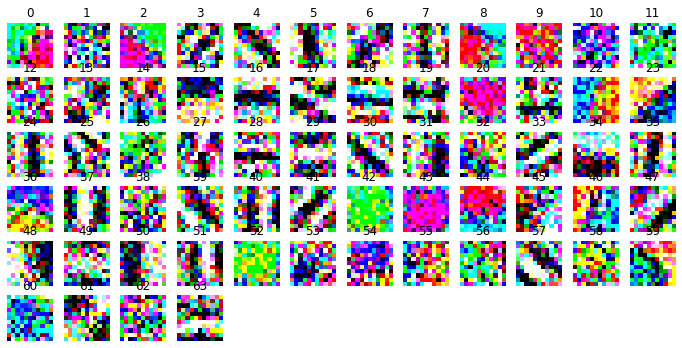

In [14]:
model4 = initialize_model(num_classes, feature_extract, use_pretrained=False)

# Load the best model checkpoint, if you have one
if os.path.isfile(os.path.join(MODEL_FOLDER, "4.pt")):
    checkpoint = torch.load(os.path.join(MODEL_FOLDER, "4.pt"))
    model4.load_state_dict(checkpoint['model_state_dict'])
    
plot_weights(model4, 0, single_channel = False)

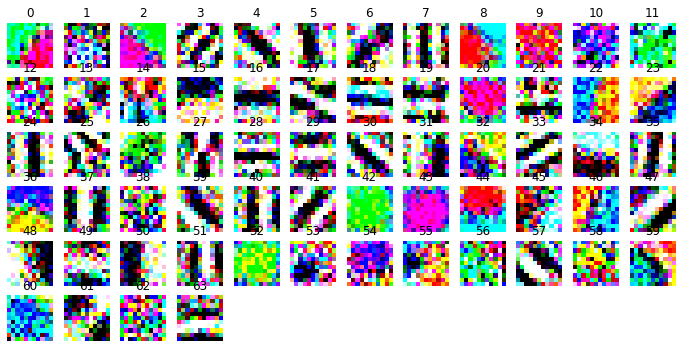

In [16]:
model9 = initialize_model(num_classes, feature_extract, use_pretrained=False)

# Load the best model checkpoint, if you have one
if os.path.isfile(os.path.join(MODEL_FOLDER, "9.pt")):
    checkpoint = torch.load(os.path.join(MODEL_FOLDER, "9.pt"))
    model9.load_state_dict(checkpoint['model_state_dict'])
    
plot_weights(model9, 0, single_channel = False)

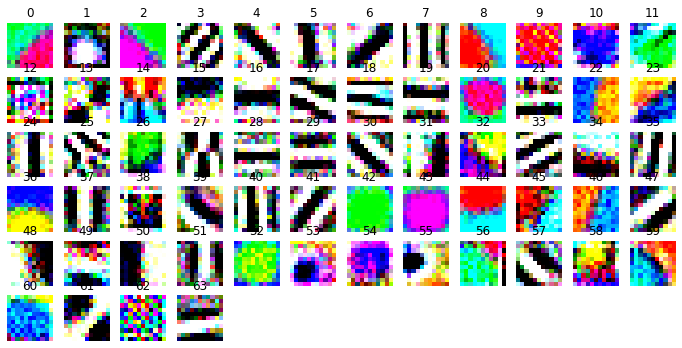

In [12]:
model29 = initialize_model(num_classes, feature_extract, use_pretrained=False)

# Load the best model checkpoint, if you have one
if os.path.isfile(os.path.join(MODEL_FOLDER, "29.pt")):
    checkpoint = torch.load(os.path.join(MODEL_FOLDER, "29.pt"))
    model29.load_state_dict(checkpoint['model_state_dict'])
    
plot_weights(model29, 0, single_channel = False)